In [291]:
import pandas as pd
import pylab
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
%matplotlib inline

In [292]:
G_df = pd.read_csv('Graffiti.csv')
P_df = pd.read_csv('Pot_holes.csv')
S_df = pd.read_csv('Sanitation.csv')
V_df = pd.read_csv('VA_Buildings.csv')

In [293]:
G_df.columns = [x.lower() for x in G_df.columns]
P_df.columns = [x.lower() for x in P_df.columns]
S_df.columns = [x.lower() for x in S_df.columns]
V_df.columns = [x.lower() for x in V_df.columns]

In [294]:
G_df['type of service request'] = 'Graffiti Removal'
P_df['type of service request'] = 'Pothole'
S_df['type of service request'] = 'Sanitation Code Violation'
V_df['type of service request'] = 'Vacant/Abandoned Bldg'

In [ ]:
V_df = V_df.rename(columns={'date service request was received':'creation date'})
G_df['creation date'] = pd.to_datetime(G_df['creation date'])
P_df['creation date'] = pd.to_datetime(P_df['creation date'])
S_df['creation date'] = pd.to_datetime(S_df['creation date'])
V_df['creation date'] = pd.to_datetime(V_df['creation date'])

In [143]:
G_df['completion date'] = pd.to_datetime(G_df['completion date'])
P_df['completion date'] = pd.to_datetime(P_df['completion date'])
S_df['completion date'] = pd.to_datetime(S_df['completion date'])

In [270]:
G_df['response time'] = G_df['completion date'] - G_df['creation date'] 
P_df['response time'] = P_df['completion date'] - P_df['creation date'] 
S_df['response time'] = S_df['completion date'] - S_df['creation date'] 

In [271]:
com_df = pd.concat([G_df,P_df,S_df,V_df], axis=0)

In [146]:
com_counts = com_df['type of service request'].value_counts()

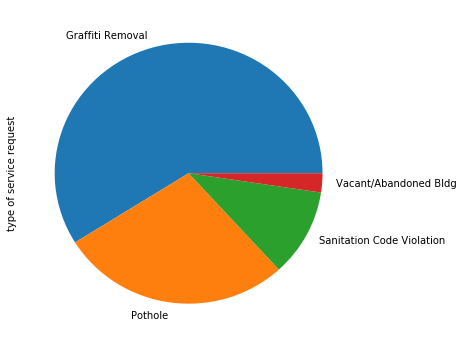

In [147]:
com_counts.plot.pie(figsize=(6,6))

The pie chart above contains our first interesting fact!
1. Graffiti Removal is this past year's most frequent 311 request with more than the three other types combined. Graffiti is well-acquainted feature of Chicago's most robust neighborhoods, but we can gleam the public desire to remove unwanted public art from this data. As we move down the other types, we nearly fall one-third in frequency at a constant rate until reported vacant and abandoned buildings holding up a sliver. It appears that abandoned buildings are not a generally major hassle for most residents.

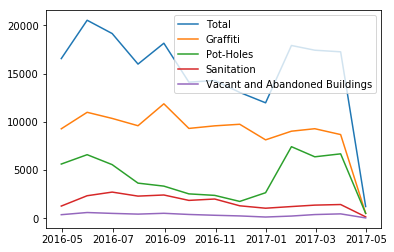

In [149]:
com_bytime = com_df.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(com_bytime, label='Total')

g_bytime = G_df.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(g_bytime, label='Graffiti Removal')

p_bytime = P_df.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(p_bytime, label='Potholes')

s_bytime = S_df.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(s_bytime, label='Sanitation Code Violation')

v_bytime = V_df.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(v_bytime, label='Vacant/Abandoned Bldgs')

plt.plot(); plt.legend(loc='best'); plt.show()

The time series graph above contains our second, third, and fourth interesting facts!
2. In summer time leading into September, we can observe a sharp spike in Graffiti (orange) which ultimately contributes most to a similar sharp spike in Total requests (blue). Since the schoolyear begins in September, there could be worthwhile investigations into youth prevalence on streets and graffiti concerns. 
3. Beginning in the winter leading into February, there is a sharp rise in pot-hole sightings. Winter tends to be the most grueling to overcome degrading potholes, and there could be a relationship between road salt maintenance and road degradation.
4. All 311 activity seems to rise minorly in late spring into June. Sanitation code complaints seems to peak in Chicago's hottest weather, nodding to certain health violation signs such as odor.

In [276]:
com_byneigh = com_df.groupby('community area').size()
plt.plot(com_bytime, label='Total')

g_byneigh = G_df.groupby('community area').size()
plt.plot(g_byneigh, label='Graffiti Removal')

p_byneigh = P_df.groupby('community area').size()
plt.plot(p_byneigh, label='Potholes')

s_byneigh = S_df.groupby('community area').size()
plt.plot(s_byneigh, label='Sanitation Code Violation')

v_byneigh = V_df.groupby('community area').size()
plt.plot(v_byneigh, label='Vacant/Abandoned Bldgs')

plt.plot(); plt.legend(loc='best'); plt.show()

ValueError: ordinal must be >= 1

The neighborhood-based graph above contains our fifth interesting fact!
5. 

In [278]:
com_byresp = com_df.groupby('response time').size()
plt.plot(com_byresp, label='Total')

g_byresp = G_df.groupby('response time').size()
plt.plot(g_byresp, label='Graffiti')

p_byresp = P_df.groupby('response time').size()
plt.plot(p_byresp, label='Pot-Holes')

s_byresp = S_df.groupby('response time').size()
plt.plot(s_byresp, label='Sanitation')

plt.plot(); plt.legend(loc=['best']); plt.show()

AssertionError: 

In [171]:
def fcc_api(lat, long):
    '''
    Given a lat/lng coordinate, output a full FIPS id 
    '''
    URL = "http://data.fcc.gov/api/block/find?latitude=" + str(lat) + "&longitude=" + str(long) + "&showall=true"
    r = requests.get(URL)
    tree = ET.fromstring(r.content)
    full_id = tree[0].attrib['FIPS']
    return full_id

My computer is woefully slow after a few dozen loops. 
I chose to limit my data to 1 month, running on Vacated/Abandoned Buildings and Sanitation Code Complaints.

In [170]:
v_blocks = []
V1_df = V_df[V_df["creation date"] > '2017-03-05']
for x in V1_df.iterrows():
    lat, long = x[1][20], x[1][21]
    v_blocks.append(fcc_api(lat,long))

ParseError: mismatched tag: line 1, column 967 (<string>)

In [209]:
s_blocks = []
S1_df = S_df[S_df["creation date"] > '2017-03-5']
for x in S1_df.iterrows():
    lat, long = x[1][15].strip("(, )").split(', ')
    s_blocks.append(fcc_api(lat,long))

['170318309001040',
 '170318322002005',
 '170318434001004',
 '170317608032006',
 '170310207024006',
 '170310208024004',
 '170312212002004',
 '170310307033005',
 '170311603002004',
 '170311603002005',
 '170316201002008',
 '170312004023004',
 '170318411001021',
 '170312222002003',
 '170310206012002',
 '170316304003004',
 '170314309001000',
 '170315101002054',
 '170316305003006',
 '170312511001010',
 '170315103003013',
 '170318439001022',
 '170312520002005',
 '170314601001001',
 '170314313012005',
 '170314305003011',
 '170312301001014',
 '170318317001041',
 '170318391001091',
 '170311606021000',
 '170311606021000',
 '170311606021000',
 '170311606021000',
 '170311901001010',
 '170311408004008',
 '170318391002044',
 '170312315006036',
 '170318396002019',
 '170318347003014',
 '170315303003019',
 '170310702001011',
 '170310512002000',
 '170318378001018',
 '170310803003010',
 '170318369002006',
 '170318378002014',
 '170315805022000',
 '170316913002004',
 '170318387004013',
 '170318368001025',


In [133]:
URL_list = []

http://api.census.gov/data/2011/acs5?get=[the data code that you found above]&for=tract:[tract code or *]&in=state:[state code]+county:[county code]&key=[your key]

,service request type,service request number,creation date,"location of building on the lot (if garage, change type code to bgd).",is the building dangerous or hazardous?,is building open or boarded?,"if the building is open, where is the entry point?",is the building currently vacant or occupied?,is the building vacant due to fire?,"any people using property? (homeless, childen, gangs)",address street number,address street direction,address street name,address street suffix,zip code,x coordinate,y coordinate,ward,police district,community area,latitude,longitude,location,type of service request
0,Vacant/Abandoned Building,16-02245017,2016-04-04,Front,NaN,Open,FRONT,Vacant,False,False,131,E,103RD,PL,60628,1.179085e+06,1.836380e+06,9,5,49,41.706316,-87.619810,"(41.706316349642435, -87.61980966474108)",Vacant/Abandoned Bldg
1,Vacant/Abandoned Building,16-02248875,2016-04-04,Front,NaN,Open,FRONT DOOR WIDE OPEN/GARAGE SIDE DOOR WIDE OPEN,Vacant,False,True,7933,S,DANTE,AVE,60619,1.187230e+06,1.852675e+06,8,4,45,41.750841,-87.589465,"(41.7508413687313, -87.5894654145728)",Vacant/Abandoned Bldg
2,Vacant/Abandoned Building,16-02251252,2016-04-04,Front,NaN,Open,NaN,Vacant,False,False,733,E,134TH,PL,60827,1.183655e+06,1.816170e+06,9,5,54,41.650752,-87.603700,"(41.65075158509962, -87.60369974504695)",Vacant/Abandoned Bldg
3,Vacant/Abandoned Building,16-02255526,2016-04-04,Rear,NaN,Boarded,NaN,Vacant,False,True,7848,S,KIMBARK,AVE,60619,1.186241e+06,1.853217e+06,8,4,45,41.752351,-87.593075,"(41.752351369868464, -87.5930745568237)",Vacant/Abandoned Bldg
4,Vacant/Abandoned Building,16-02255561,2016-04-04,Garage,NaN,Open,FRONT DOOR HOUSE/GARAGE DOORS,Vacant,False,True,7531,S,COLFAX,AVE,60649,1.194820e+06,1.855526e+06,7,4,43,41.758482,-87.561560,"(41.758481656983264, -87.56155969009926)",Vacant/Abandoned Bldg
5,Vacant/Abandoned Building,16-02250794,2016-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1445,E,67TH,PL,60637,1.187003e+06,1.860525e+06,5,3,43,41.772387,-87.590051,"(41.7723869206673, -87.5900507563601)",Vacant/Abandoned Bldg
6,Vacant/Abandoned Building,16-02254820,2016-04-04,Rear,NaN,Boarded,HOLE IN REAR OF BLDG,Vacant,False,False,8005,S,DR MARTIN LUTHER KING JR,DR,60619,1.180290e+06,1.852017e+06,6,6,44,41.749199,-87.614918,"(41.74919859596181, -87.61491769547918)",Vacant/Abandoned Bldg
7,Vacant/Abandoned Building,16-02253011,2016-04-04,Rear,NaN,Open,NaN,Vacant,False,False,7842,S,COLFAX,AVE,60649,1.194880e+06,1.853471e+06,7,4,43,41.752840,-87.561406,"(41.752839638861346, -87.56140586219601)",Vacant/Abandoned Bldg
8,Vacant/Abandoned Building,16-02254420,2016-04-04,Rear,NaN,Boarded,NaN,Vacant,False,False,6004,S,FAIRFIELD,AVE,60629,1.159072e+06,1.864724e+06,16,8,66,41.784528,-87.692322,"(41.78452807455499, -87.69232183549155)",Vacant/Abandoned Bldg
9,Vacant/Abandoned Building,16-02246712,2016-04-04,Rear,NaN,Open,FRONT DOOR,Vacant,False,False,1222,W,72ND,PL,60636,1.169380e+06,1.856709e+06,6,7,67,41.762317,-87.654761,"(41.762316791460755, -87.65476135743857)",Vacant/Abandoned Bldg


In [217]:
def census_api(add_data, tract, state, county, key):
    '''
    Given api parameters, returns query output from census api
    '''
    URL = 'http://api.census.gov/data/2015/acs5?get=' + str(add_data) + '&for=tract:' + str(tract) + '&in=state:' + str(state) + '+county:' + str(county) + '&key=' + str(key)
    r = requests.get(URL)
    return r

In [222]:
# Chinese, Median Income, Median Age
add_data = 'B02015_007E,B06011_001E,B01002_001E'

key = 'ddc73208b194992eb71bc5e3c564347e414f2d62'
IL = '17'
Cook = '031'

In [224]:
s_newdata = []

for fips in s_blocks:
    s_newdata.append(census_api(add_data,fips[5:11],IL,Cook,key))

In [225]:
v_newdata = []

for fips in v_blocks:
    v_newdata.append(census_api(add_data,fips[5:11],IL,Cook,key))

In [282]:
chinese = []
income = []
age = []

for x in s_newdata:
    data = x.json()
    chinese.append(data[1][0])
    income.append(data[1][1])
    age.append(data[1][2])

Snew_df = S1_df
Snew_df["Chinese"] = chinese
Snew_df["Median Income"] = income
Snew_df["Median Age"] = age

C:\Users\Andrew Mao\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Andrew Mao\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Andrew Mao\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

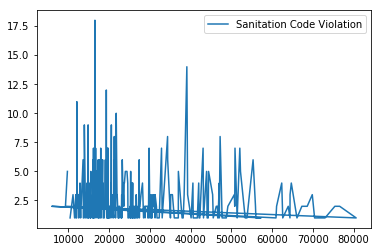

In [288]:
s_bynewdata = Snew_df.groupby('Median Income').size()
plt.plot(s_bynewdata, label='Sanitation Code Violation')

#v_bynewdata = Vnew_df.groupby('Median Income').size()
#plt.plot(v_bynewdata, label='Vacant/Abandoned Bldgs')

plt.plot(); plt.legend(loc='best'); plt.show()

The above graph shows concentation of sanitation violations across different blocks of 

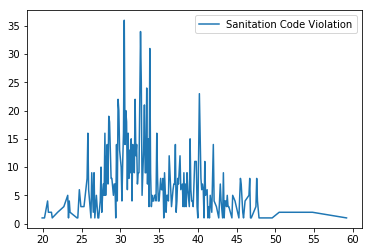

In [289]:
s_bynewdata = Snew_df.groupby('Median Age').size()
plt.plot(s_bynewdata, label='Sanitation Code Violation')

#v_bynewdata = Vnew_df.groupby('Median Income').size()
#plt.plot(v_bynewdata, label='Vacant/Abandoned Bldgs')

plt.plot(); plt.legend(loc='best'); plt.show()

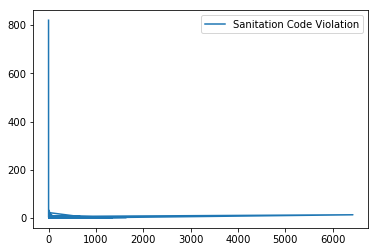

In [290]:
s_bynewdata = Snew_df.groupby('Chinese').size()
plt.plot(s_bynewdata, label='Sanitation Code Violation')

#v_bynewdata = Vnew_df.groupby('Median Income').size()
#plt.plot(v_bynewdata, label='Vacant/Abandoned Bldgs')

plt.plot(); plt.legend(loc='best'); plt.show()

In [269]:
chinese = []
income = []
age = []

for x in v_newdata:
    data = x.json()
    chinese.append(data[1][0])
    income.append(data[1][1])
    age.append(data[1][2])

Vnew_df = V1_df
print(len(chinese))
print(len(Vnew_df))
#Vnew_df["Chinese"] = chinese
#Vnew_df["Median Income"] = income
#Vnew_df["Median Age"] = age

121
453


Above, the length of my new data is not equal to the length of my 1 month dataframe of original data. This is due to an error in the API. I apologize for not being able to compare Vacant/Abandoned buildings.

In [51]:
Chicago_tracts = pd.read_csv('CensusTractsTIGER2010.csv')
tract_num = Chicago_tracts['TRACTCE10']
type(tract_num)
print(tract_num[0])

842400


    Problem 3 A
7500 S Wolcott Ave has a lat/long coordinate of [41.757380,-87.671264]. With the coordinates, we can plug it into the fcc api to get the tract and block code. If we plug that into the census api, we will be able to query the likelihood of each of our four types of requests.

In [ ]:
fips = fcc_api(41.757380,-87.671264)
census_api = 

    Problem 3 B


    Problem 3 C
To solve this problem, we are going to subtract P(Englewood|Graffiti) - P(Uptown|Graffiti). This equation expands to P(Englewood and Graffiti)/P(Graffiti) - P(Uptown and Graffiti)/P(Graffiti). 

This further expands to P(Graffiti | Englewood)* P(Englewood)/P(Graffiti) - P(Graffiti|Uptown)*P(Uptown)/P(Graffiti). 

Substituting numbers: (100/600)(600/1000)/(260/1000) - (160/400)(400/1000)/(260/1000) = -0.230769231

Therefore, it's 23% less likely that the call came from Englewood versus Uptown.